In [1]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [4]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [5]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

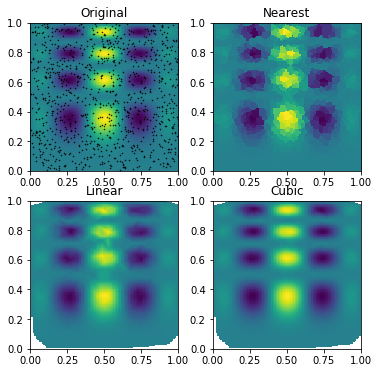

In [6]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

---

### Now lets do this with the histograms

In [7]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import root_numpy

Welcome to JupyROOT 6.12/06


In [8]:
f = r.TFile("../images/PDF_ry_y_r_combined_Calo05.root")
f.ls()
c = f.Get("c")
print([x for x in c.GetListOfPrimitives()])
c1 = c.GetPrimitive("c_1")
print([x for x in c1.GetListOfPrimitives()])
h5_ry_scaled = c1.GetPrimitive("h5_ry_scaled").Clone("h5_ry_scaled")
h5_ry_scaled.SetDirectory(0)

[<ROOT.TPad object ("c_1") at 0x7fffd46be4c0>, <ROOT.TPad object ("c_2") at 0x7fffd471be70>, <ROOT.TPad object ("c_3") at 0x7fffd47e4650>, <ROOT.TPad object ("c_4") at 0x7fffd484b290>]
[<ROOT.TFrame object ("TFrame") at 0x7fffd46be770>, <ROOT.TH2D object ("h5_ry_scaled") at 0x7fffd46da210>, <ROOT.TPaveText object ("title") at 0x7fffd4713be0>]
TFile**		../images/PDF_ry_y_r_combined_Calo05.root	
 TFile*		../images/PDF_ry_y_r_combined_Calo05.root	
  KEY: TCanvas	c;1	c


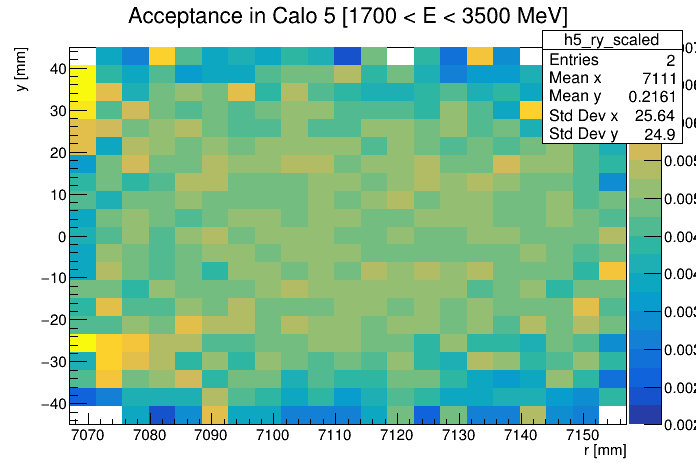

In [9]:
c = r.TCanvas()
h5_ry_scaled.Draw("colz")
c.Draw()

In [10]:
data, edges = root_numpy.hist2array(h5_ry_scaled,return_edges=True)

In [11]:
data[0]

array([0.        , 0.00270027, 0.00465116, 0.00402068, 0.00770077,
       0.00464728, 0.00427673, 0.00498148, 0.00387197, 0.00399546,
       0.00400586, 0.00384211, 0.00465863, 0.00438374, 0.00372881,
       0.00586054, 0.0058309 , 0.0066054 , 0.00878049, 0.0078329 ,
       0.        ])

In [12]:
edges

[array([7067.        , 7071.28571429, 7075.57142857, 7079.85714286,
        7084.14285714, 7088.42857143, 7092.71428571, 7097.        ,
        7101.28571429, 7105.57142857, 7109.85714286, 7114.14285714,
        7118.42857143, 7122.71428571, 7127.        , 7131.28571429,
        7135.57142857, 7139.85714286, 7144.14285714, 7148.42857143,
        7152.71428571, 7157.        ]),
 array([-45.        , -40.71428571, -36.42857143, -32.14285714,
        -27.85714286, -23.57142857, -19.28571429, -15.        ,
        -10.71428571,  -6.42857143,  -2.14285714,   2.14285714,
          6.42857143,  10.71428571,  15.        ,  19.28571429,
         23.57142857,  27.85714286,  32.14285714,  36.42857143,
         40.71428571,  45.        ])]

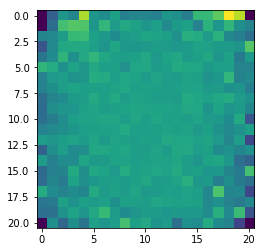

In [13]:
plt.imshow(data,origin='upper')
plt.show()

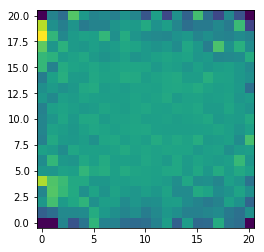

In [14]:
plt.imshow(data.T,origin='lower')
plt.show()

In [15]:
binLocations = []
binContents = []
for i in range(1,h5_ry_scaled.GetNbinsX()):
    for j in range(1,h5_ry_scaled.GetNbinsY()):
        centerix = h5_ry_scaled.GetXaxis().GetBinCenter(i)
        centeriy = h5_ry_scaled.GetYaxis().GetBinCenter(j)
        contenti = h5_ry_scaled.GetBinContent(i,j)
        #print(centerix ,centeriy , contenti)
        
        binLocations.append((centerix, centeriy))
        binContents.append(contenti)

ding = [x for x in zip(*binLocations)]

binLocations = np.array(binLocations)
binContents = np.array(binContents)

In [16]:
grid_x, grid_y = np.mgrid[7000:7200:2000j, -45:45:1000j]
grid_z0 = griddata(binLocations, binContents, (grid_x, grid_y), method='linear')

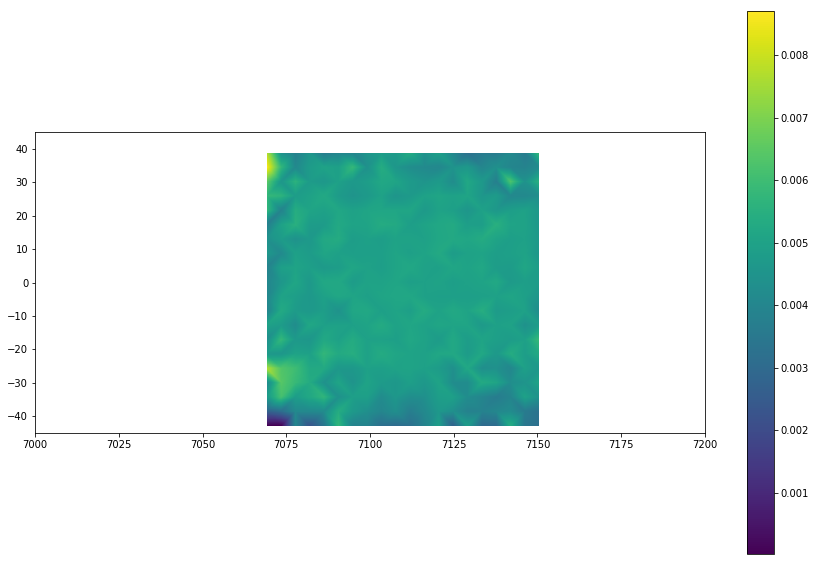

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
im = plt.imshow(grid_z0.T, extent=(7000,7200,-45,45), origin='lower')
#im = plt.scatter(ding[0],ding[1],c=binContents)

plt.colorbar(im)
plt.title('')
plt.show()

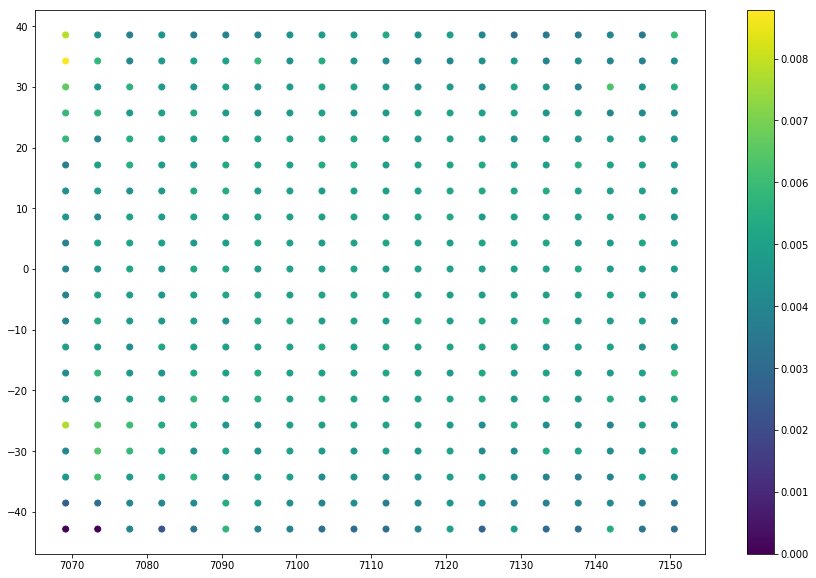

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
#im = plt.imshow(grid_z0.T, extent=(7000,7200,-45,45), origin='lower')
im = plt.scatter(ding[0],ding[1],c=binContents)
plt.colorbar(im)
plt.title('')
plt.show()

(array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40.]),
 array([-42.85714286, -34.71428571, -26.57142857, -18.42857143,
        -10.28571429,  -2.14285714,   6.        ,  14.14285714,
         22.28571429,  30.42857143,  38.57142857]),
 <a list of 10 Patch objects>)

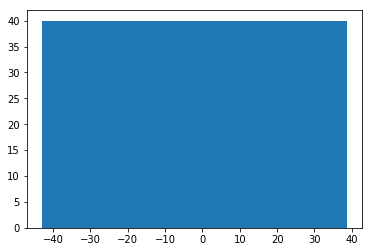

In [20]:
plt.hist(ding[1])

---

### Now we can do the same thing with RBF instead

In [19]:
from scipy.interpolate import Rbf
x, y, z, d = np.random.rand(4, 50)
rbfi = Rbf(x, y, d)  # radial basis function interpolator instance
xi = yi = zi = np.linspace(0, 1, 20)
di = rbfi(xi, yi)   # interpolated values
di.shape

(20,)

In [20]:
rbfi

In [21]:
rbfi = Rbf(ding[0],ding[1],binContents, function="gaussian")

In [22]:
grid_x, grid_y = np.mgrid[7050:7170:500j, -50:50:500j]

Z = rbfi(grid_x, grid_y)

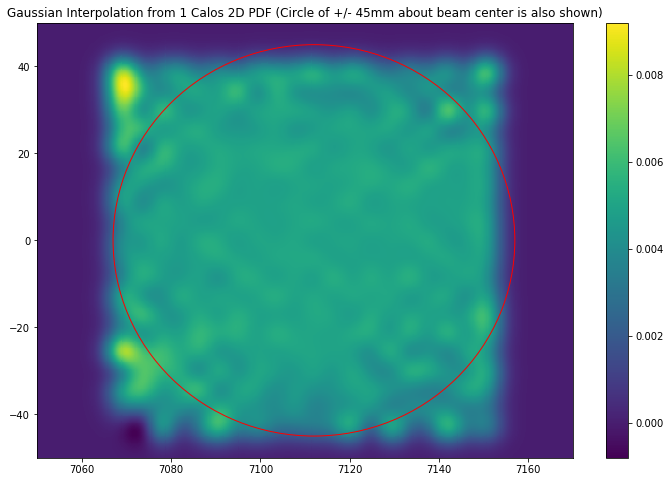

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
im = plt.pcolor(grid_x, grid_y, Z)
plt.colorbar(im)

circle1 = plt.Circle((7112, 0), 45, color='r', alpha=1, fill=False)
ax.add_artist(circle1)

plt.title("Gaussian Interpolation from 1 Calos 2D PDF (Circle of +/- 45mm about beam center is also shown)")

plt.show()

In [24]:
rbfi(7100,-20)

array(0.00498065)

---

### Now lets try with the 3D version

In [28]:
f = r.TFile("../PDF_AllCalos_RoughBinning_May13.root")
f.ls()
c = f.Get("c1_n2")
print([x for x in c.GetListOfPrimitives()])
scaledMuonDist = c.GetPrimitive("scaledMuonDist").Clone("scaledMuonDist")

[<ROOT.TH3D object ("scaledMuonDist") at 0x7f466441c780>, <ROOT.TPaveText object ("title") at 0x7ffff81b1310>]
TFile**		../PDF_AllCalos_RoughBinning_May13.root	
 TFile*		../PDF_AllCalos_RoughBinning_May13.root	
  KEY: TCanvas	c1_n2;1	c1_n2


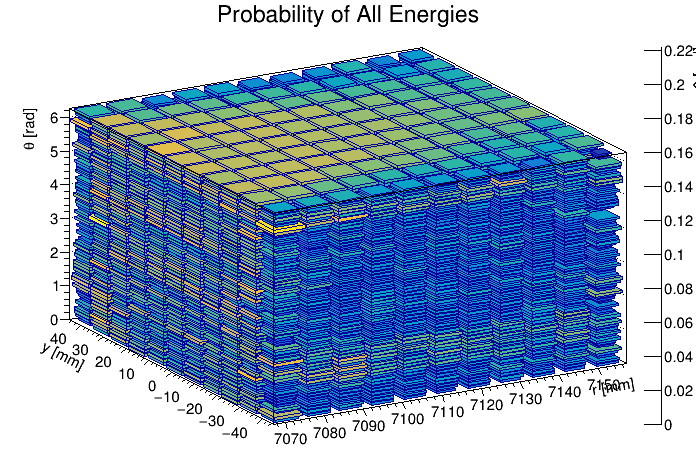

In [29]:
c = r.TCanvas()
scaledMuonDist.Draw("lego2z")
c.Draw()

In [31]:
scaledMuonDist.GetSize()

10985

In [32]:
binLocations = []
binContents = []
for i in range(1,h5_ry_scaled.GetNbinsX()):
    for j in range(1,h5_ry_scaled.GetNbinsY()):
        for k in range(scaledMuonDist.GetNbinsZ()):
            centerix = scaledMuonDist.GetXaxis().GetBinCenter(i)
            centeriy = scaledMuonDist.GetYaxis().GetBinCenter(j)
            centeriz = scaledMuonDist.GetZaxis().GetBinCenter(k)
            contenti = scaledMuonDist.GetBinContent(i,j,k)
            #print(centerix ,centeriy , contenti)

            binLocations.append((centerix, centeriy, centeriz))
            binContents.append(contenti)

ding = [x for x in zip(*binLocations)]

binLocations = np.array(binLocations)
binContents = np.array(binContents)